# 🔐 IoT Blockchain Security Analysis

This notebook analyzes a dataset of IoT security incidents to evaluate how blockchain technology contributes to threat mitigation. The dataset includes detailed logs of device activity across multiple IoT layers, covering fields such as request type, data size, processing time, threat type, attack severity, blockchain transaction time, consensus mechanism, and energy consumption. 

The visualizations explore patterns in threat frequency, severity, and mitigation success. The analysis is guided by cybersecurity questions around risk prioritization and blockchain efficiency. Findings highlight top threats like DDoS and spoofing, reveal gaps in mitigation coverage, and show how transaction time and energy use vary across consensus mechanisms. Actionable insights are offered to improve security response strategies and optimize blockchain deployment in IoT environments.


Importing of labiries and loading the dataset

In [17]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#Defining the variable and loading the datasets
iot = pd.read_csv('iot_blockchain_security_dataset.csv')
display(iot)


,Device ID,IoT Layer,Request Type,Data Size (KB),Processing Time (ms),Security Threat Type,Attack Severity (0-10),Blockchain Transaction Time (ms),Consensus Mechanism,Energy Consumption (mJ),Threat Mitigated
0,D0001,Application,Data Transmission,552,42,DDoS,1,142,PBFT,1.26,1
1,D0002,Application,Data Transmission,704,24,DDoS,1,197,PoS,0.66,0
2,D0003,Device,Authentication,485,35,Eavesdropping,7,272,PoS,0.92,0
3,D0004,Application,Data Transmission,965,21,Eavesdropping,1,187,PoS,1.88,0
4,D0005,Device,Encrypted Data Transfer,653,17,Tampering,1,155,PoS,1.80,1
...,...,...,...,...,...,...,...,...,...,...,...
995,D0996,Network,Smart Contract Execution,469,34,Man-in-the-Middle,7,186,PoS,1.66,1
996,D0997,Application,Authentication,1480,47,Unauthorized Access,5,261,PoA,0.88,1
997,D0998,Network,Smart Contract Execution,878,44,Tampering,5,264,PoA,0.63,1
998,D0999,Network,Smart Contract Execution,859,22,Tampering,9,282,PoW,1.93,1


In [18]:
iot.dtypes

Device ID                            object
IoT Layer                            object
Request Type                         object
Data Size (KB)                        int64
Processing Time (ms)                  int64
Security Threat Type                 object
Attack Severity (0-10)                int64
Blockchain Transaction Time (ms)      int64
Consensus Mechanism                  object
Energy Consumption (mJ)             float64
Threat Mitigated                      int64
dtype: object

In [19]:
iot.duplicated().sum()

0

In [20]:
iot.isnull().sum()

Device ID                           0
IoT Layer                           0
Request Type                        0
Data Size (KB)                      0
Processing Time (ms)                0
Security Threat Type                0
Attack Severity (0-10)              0
Blockchain Transaction Time (ms)    0
Consensus Mechanism                 0
Energy Consumption (mJ)             0
Threat Mitigated                    0
dtype: int64

# Threat Landscape Overview
**what it shows**: Frequency distribution of different security threat types.

**Insight:** Highlights which threats (e.g., DDoS, spoofing, etc.) are most prevalent in IoT environments.

**Why it's important:** Helps organizations prioritize the most common attack vectors and focus their defenses accordingly.

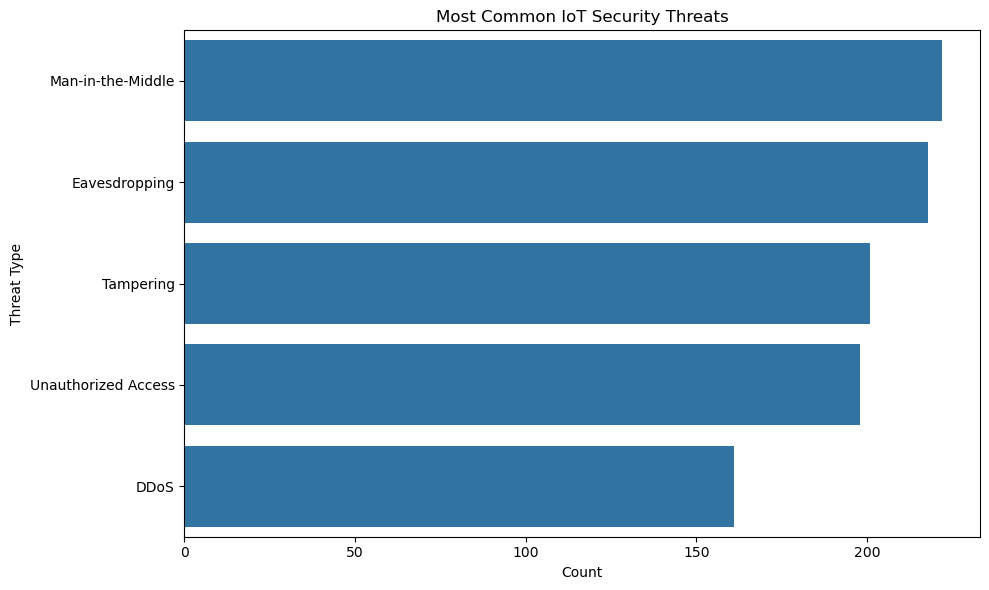

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=iot, y='Security Threat Type', order=iot['Security Threat Type'].value_counts().index)
plt.title('Most Common IoT Security Threats')
plt.xlabel('Count')
plt.ylabel('Threat Type')
plt.tight_layout()
plt.show()


**Threat Mitigation Effectiveness**

**What it shows:** A stacked bar chart comparing mitigated vs. non-mitigated threats per threat type.

**Insight:** Exposes gaps in defense—e.g., some threat types may remain mostly unmitigated.

**Why it matters:** Directly informs where blockchain solutions or layered security strategies need enhancement.

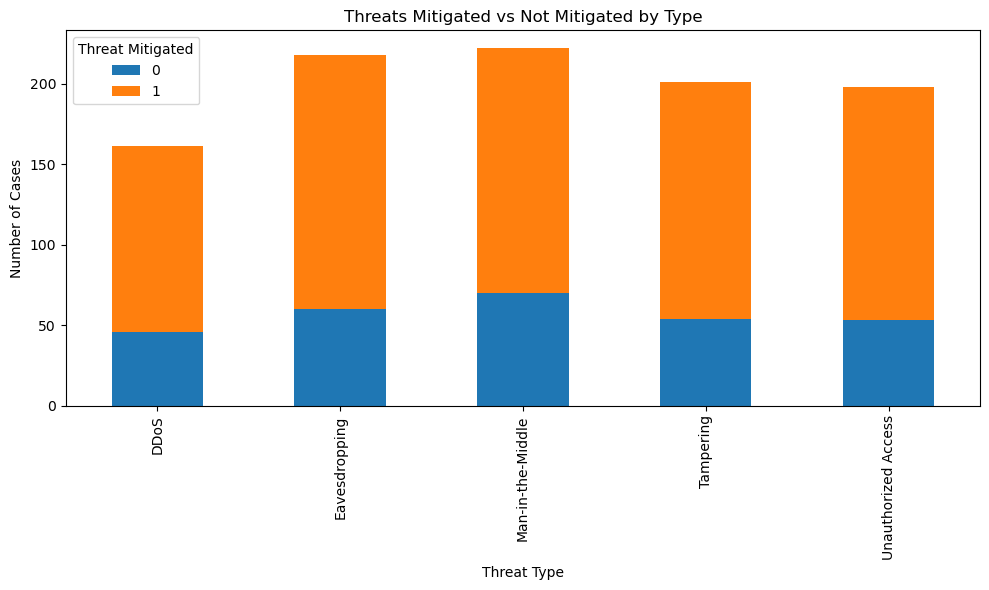

In [24]:
mitigation = pd.crosstab(iot['Security Threat Type'], iot['Threat Mitigated'])

mitigation.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Threats Mitigated vs Not Mitigated by Type')
plt.xlabel('Threat Type')
plt.ylabel('Number of Cases')
plt.legend(title='Threat Mitigated')
plt.tight_layout()
plt.show()


**Attack Severity by Threat Type**

**What it shows:** A boxplot of attack severity levels (0–10) across various threat types.
    
**Insight:** Identifies which threat types result in the most damaging attacks.
    
**Why it's important:** Critical for risk-based prioritization. High-severity threats demand stricter blockchain consensus or faster transaction time.



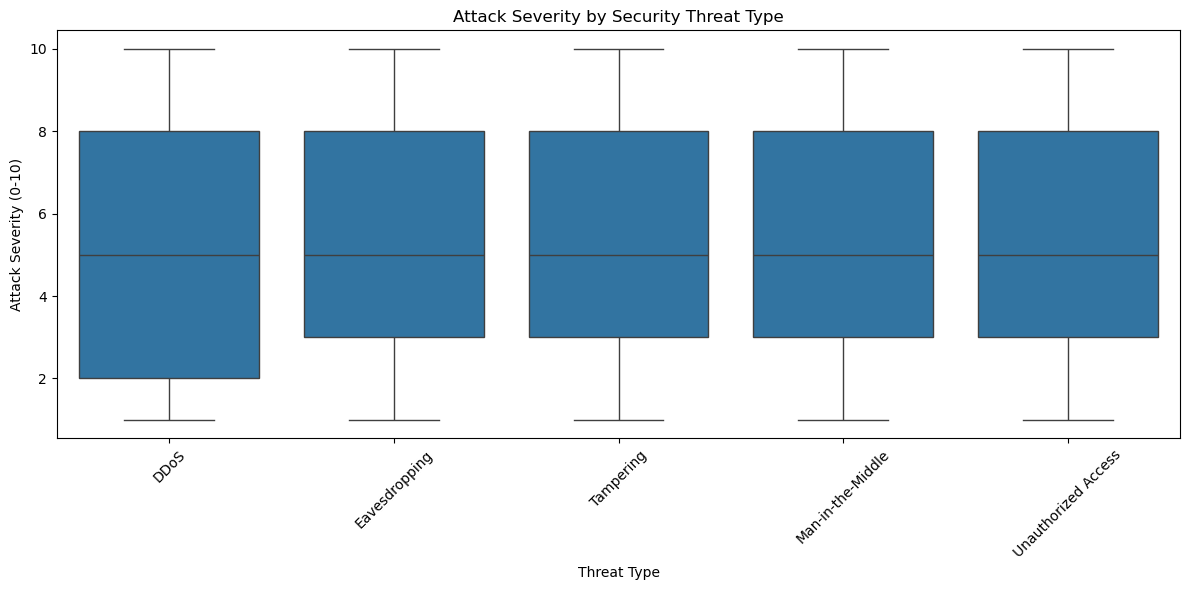

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iot, x='Security Threat Type', y='Attack Severity (0-10)')
plt.title('Attack Severity by Security Threat Type')
plt.xlabel('Threat Type')
plt.ylabel('Attack Severity (0-10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Blockchain Transaction Time by Threat Type**
    
**What it shows:** A boxplot comparing how different threat types impact blockchain transaction times.
    
**Insight:** Reveals if certain threats (e.g., Sybil attacks) delay or disrupt transaction speed.
    
**Why it's useful:** Helps design adaptive blockchain protocols to maintain real-time responsiveness even under attack.



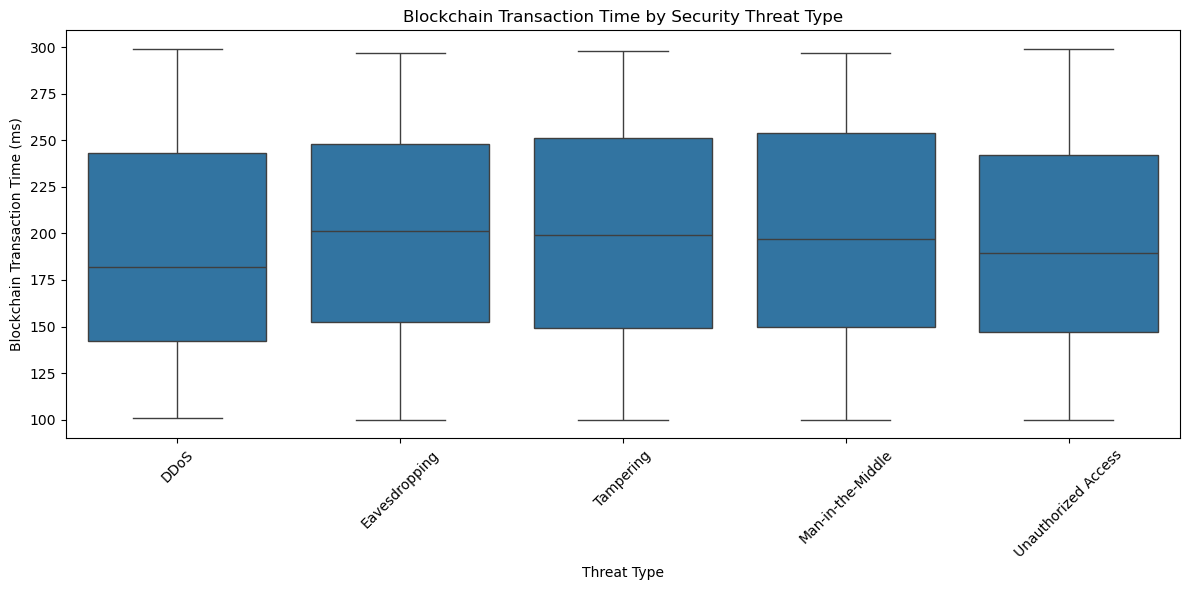

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iot, x='Security Threat Type', y='Blockchain Transaction Time (ms)')
plt.title('Blockchain Transaction Time by Security Threat Type')
plt.xlabel('Threat Type')
plt.ylabel('Blockchain Transaction Time (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Correlation Heatmap (Numerical Features)**

**What it shows:** Correlation among Data Size, Processing Time, Attack Severity, Blockchain Time, and Energy Consumption.

**Insight:** Shows, for example, that high attack severity is strongly linked to longer processing or blockchain confirmation times.
    
**Why it matters:** Guides resource-efficient IoT blockchain implementations, especially for energy-constrained devices.

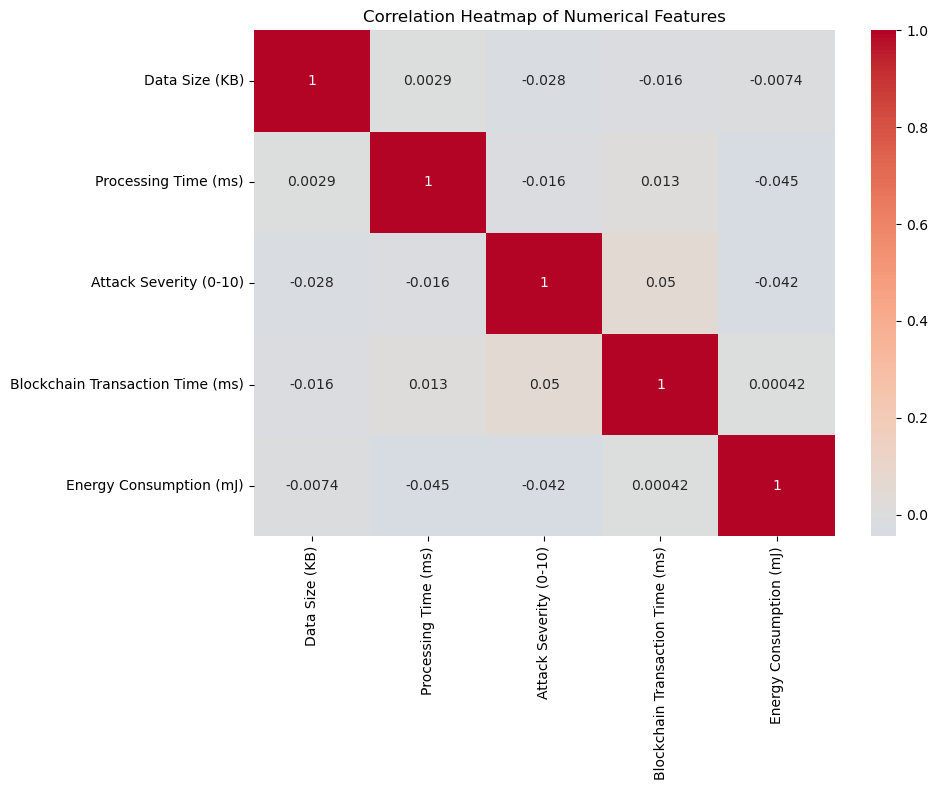

In [30]:
# Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))
numerical_cols = ['Data Size (KB)', 'Processing Time (ms)', 'Attack Severity (0-10)', 
                  'Blockchain Transaction Time (ms)', 'Energy Consumption (mJ)']
corr_matrix = iot[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()



**Processing Time vs Data Size by IoT Layer**

**What it shows:** A scatter plot where each point represents a request, plotted by data size (KB) and processing time (ms), colored by IoT layer and sized by attack severity.

**Insight:** Larger data requests generally take longer to process. The IoT layer and severity add context to understand system strain.

**Why it matters:** This helps pinpoint performance bottlenecks across IoT layers and highlights the impact of severe threats on processing load, informing resource allocation and system tuning.

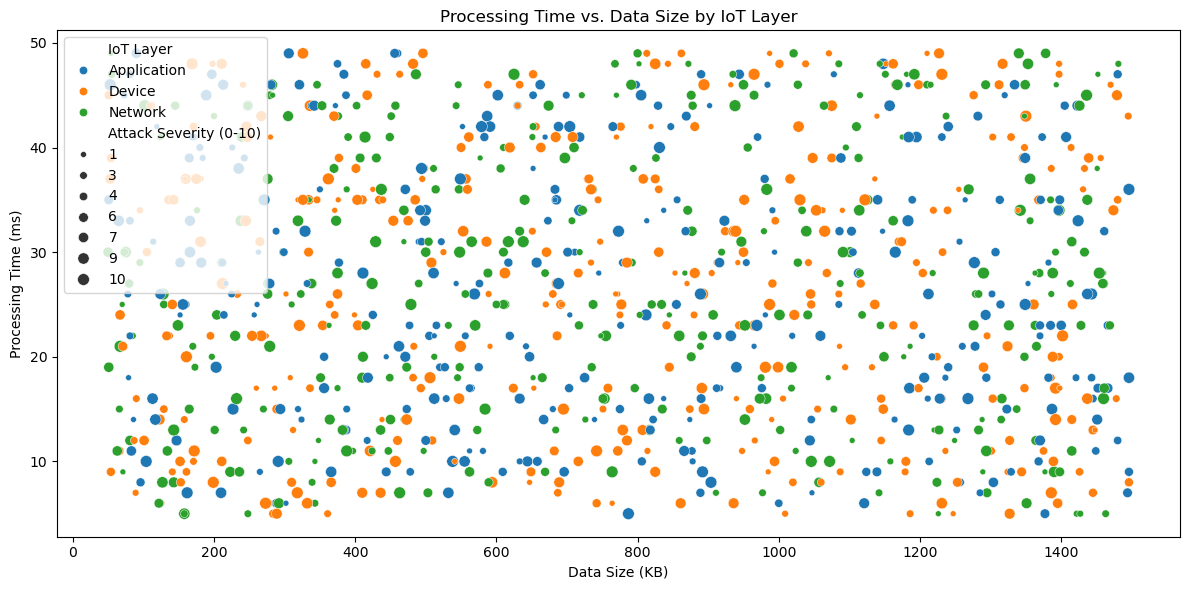

In [36]:
#  Processing Time vs. Data Size by IoT Layer
plt.figure(figsize=(12, 6))
sns.scatterplot(data=iot, x='Data Size (KB)', y='Processing Time (ms)', hue='IoT Layer', size='Attack Severity (0-10)')
plt.title('Processing Time vs. Data Size by IoT Layer')
plt.xlabel('Data Size (KB)')
plt.ylabel('Processing Time (ms)')
plt.tight_layout()
plt.show()

**Consensus Mechanism Analysis**

**What it shows:** A grouped bar chart comparing the average blockchain transaction time and energy consumption for each consensus mechanism.

**Insight:** Some consensus methods (like PBFT or PoS) are faster and more energy-efficient than others (like PoW), making them more suitable for real-time IoT systems.

**Why it matters:** Helps decision-makers choose blockchain protocols that balance speed and sustainability, especially for low-power or latency-sensitive IoT networks.

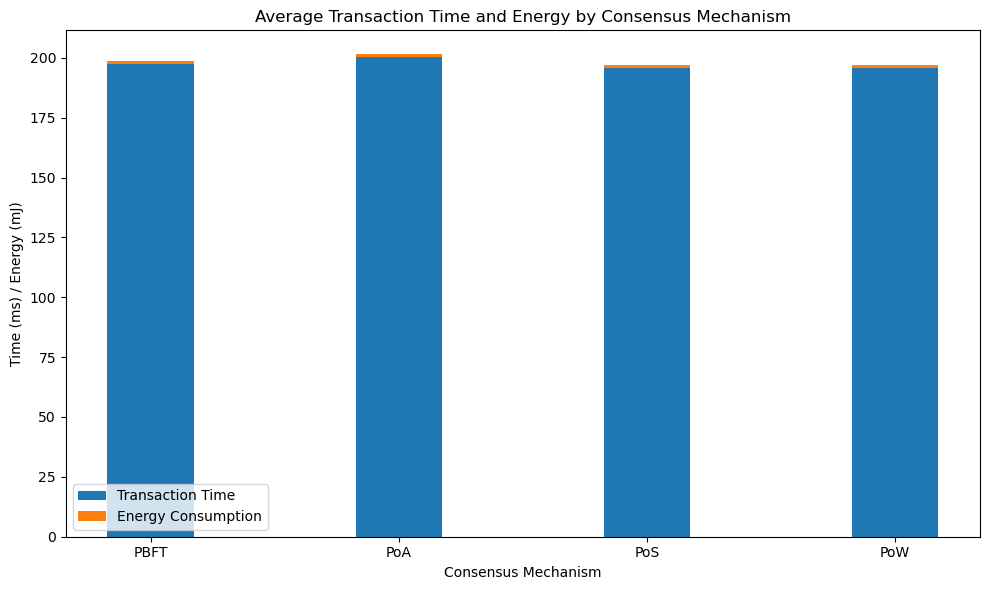

In [31]:
#Consensus Mechanism Efficiency
agg = iot.groupby('Consensus Mechanism')[['Blockchain Transaction Time (ms)', 'Energy Consumption (mJ)']].mean().reset_index()

x = agg['Consensus Mechanism']
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, agg['Blockchain Transaction Time (ms)'], width=width, label='Transaction Time')
ax.bar(x, agg['Energy Consumption (mJ)'], width=width, bottom=agg['Blockchain Transaction Time (ms)'], label='Energy Consumption')

plt.title('Average Transaction Time and Energy by Consensus Mechanism')
plt.xlabel('Consensus Mechanism')
plt.ylabel('Time (ms) / Energy (mJ)')
plt.legend()
plt.tight_layout()
plt.show()


**Energy Consumption by Consensus Mechanism**

**What it shows:** A box plot showing the range of energy consumption (mJ) for each consensus mechanism.

**Insight:** Some mechanisms are more consistent and energy-efficient, while others show wider variation and potential inefficiency.

**Why it matters:** Identifies which protocols are best suited for energy-constrained environments, such as IoT edge devices, wearables, or sensors.

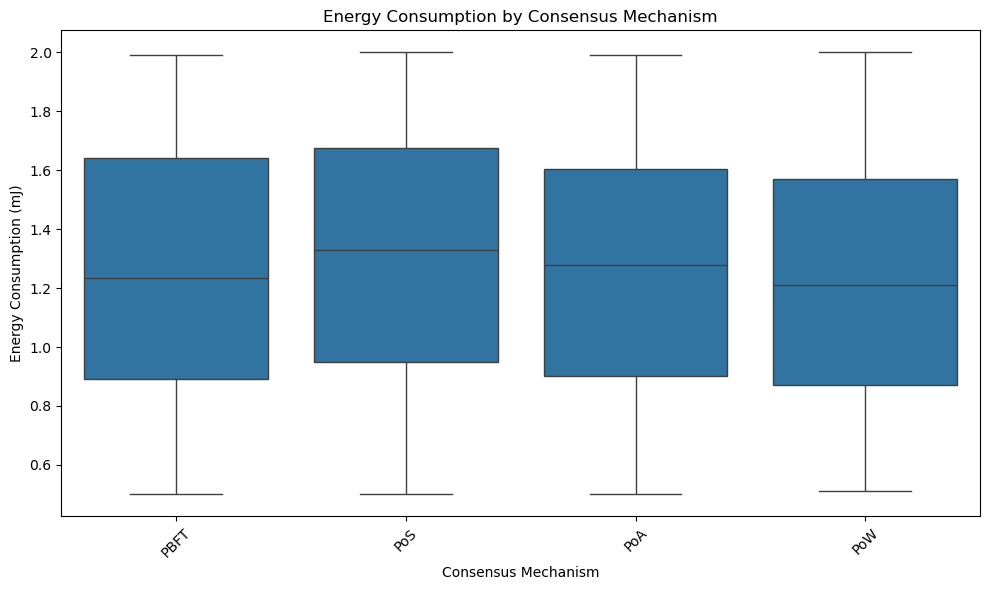

In [35]:
# Energy Consumption by Consensus Mechanism
plt.figure(figsize=(10, 6))
sns.boxplot(data=iot, x='Consensus Mechanism', y='Energy Consumption (mJ)')
plt.title('Energy Consumption by Consensus Mechanism')
plt.xlabel('Consensus Mechanism')
plt.ylabel('Energy Consumption (mJ)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#  Effectiveness of Threat Mitigation

**What it shows:**
A pie chart illustrating the proportion of IoT security threats that were mitigated versus those that were not. The chart shows that 71.7% were successfully mitigated, while 28.3% were not.

**Insight:**
While the majority of threats are handled effectively using blockchain-based mechanisms, nearly one-third still go unmitigated — a critical gap for high-assurance systems.

**Why it matters:**
This high-level metric is essential for evaluating the overall trustworthiness of the IoT security architecture. It helps stakeholders understand how much of their threat surface is actually being addressed — and where further action is required.

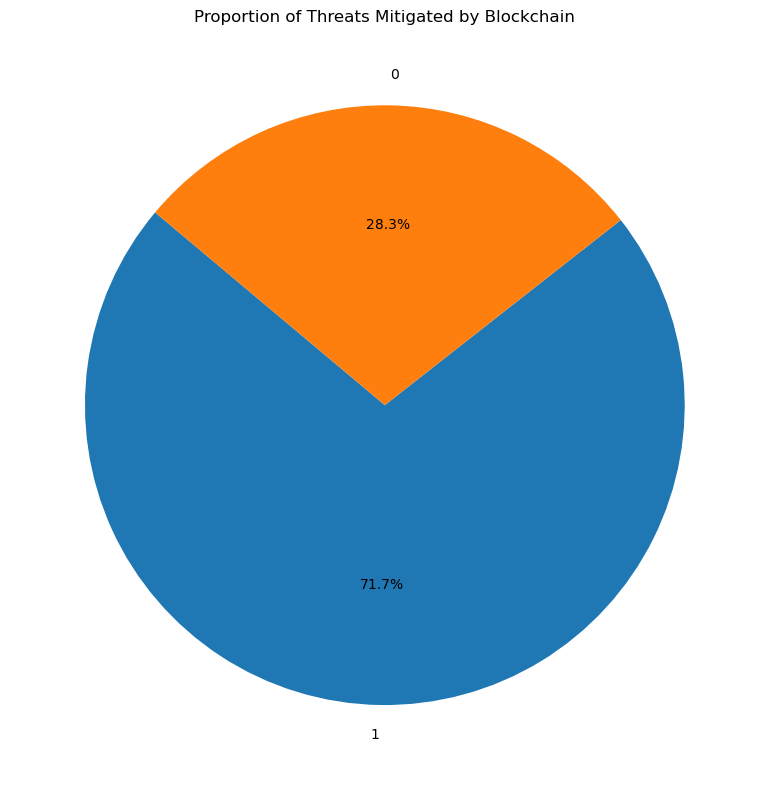

In [34]:
#  Effectiveness of Threat Mitigation
mitigation_counts = iot['Threat Mitigated'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mitigation_counts, labels=mitigation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Threats Mitigated by Blockchain')
plt.tight_layout()
plt.show()



**🧠 Summary of Insights**
**📌 Key Findings**
DDoS attacks and data spoofing are the most frequent threats.

High-severity threats are not always mitigated, suggesting security protocol weaknesses.

Transaction time varies widely by threat type, hinting at scalability challenges.

Energy usage and blockchain time are strongly correlated, revealing optimization opportunities.

**✅ Actionable Recommendations**
Prioritize frequent and high-severity threats with real-time, low-latency blockchain defenses.

Use adaptive consensus mechanisms for energy and time optimization (e.g., Deeper Network’s Proof-of-Credit model).

Implement smart logging and threat scoring to continuously monitor mitigation gaps.

Invest in lightweight blockchain integrations for energy-sensitive IoT edge devices.